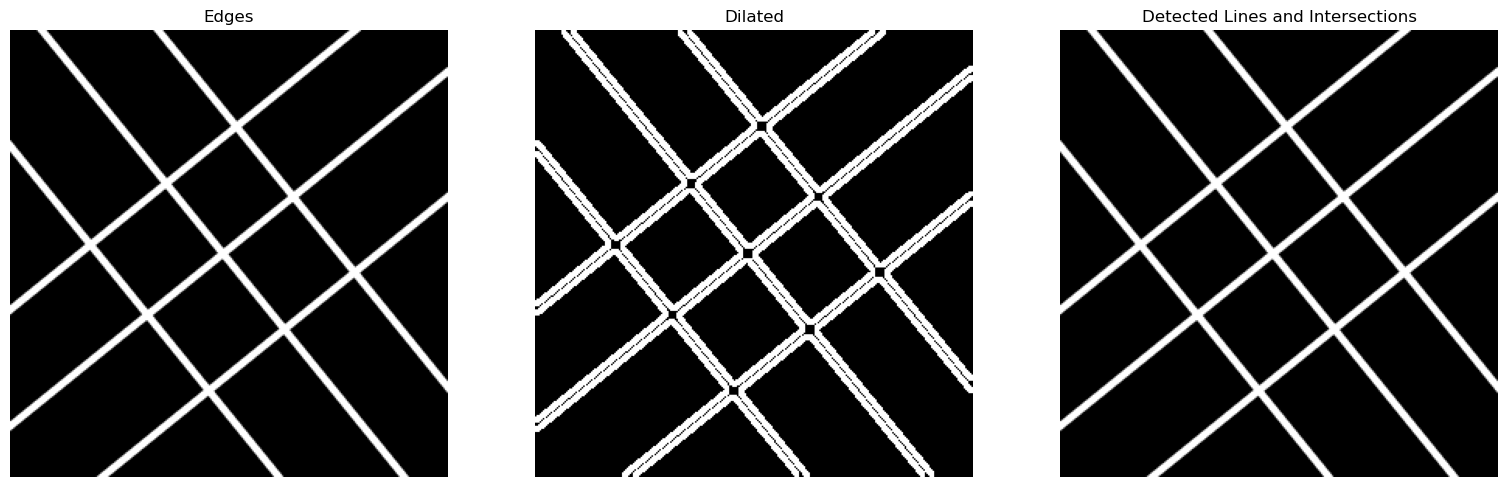

In [9]:
from commonfunctions import *
import numpy as np
import skimage
import skimage.io as io
import matplotlib.pyplot as plt
from skimage import filters, feature
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing, binary_opening, skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle
import cv2 as cv

# Convolution:
from scipy.signal import convolve2d
from scipy import fftpack
import math

# Load the image in grayscale

def clean_lines(lines):
    clean_lines = []

    for i in range(len(lines)):
        x1, y1, x2, y2 = lines[i][0]
        keep_line = False
        for j in range(len(lines)):
            if i == j:
                continue
            x3, y3, x4, y4 = lines[j][0]
            m1 = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else float('inf')
            m2 = (y4 - y3) / (x4 - x3) if (x4 - x3) != 0 else float('inf')
            if abs(m1 - m2) < 1e-3:
                continue

            vec1 = np.array([x2 - x1, y2 - y1])
            vec2 = np.array([x4 - x3, y4 - y3])

            angle = np.arccos(np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))) * 180 / np.pi

            if angle>95:
                keep_line = True
                break
        
        if keep_line:
            clean_lines.append(lines[i])

    return clean_lines

image = cv.imread('./Q1.png', cv.IMREAD_GRAYSCALE)
image_dilated = skimage.feature.canny(image, sigma=1)
image_dilated = binary_dilation(image_dilated, np.ones((3, 3)))

lines = cv.HoughLinesP(image_dilated.astype(np.uint8), 1, np.pi / 180, threshold=50, minLineLength=100, maxLineGap=5)
lines = clean_lines(lines)

result_image = cv.cvtColor(image, cv.COLOR_GRAY2BGR)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(result_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

show_images([image, image_dilated, result_image], ['Edges', 'Dilated', 'Detected Lines and Intersections'])


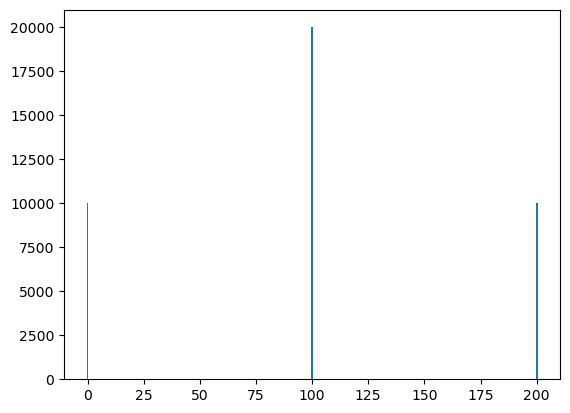

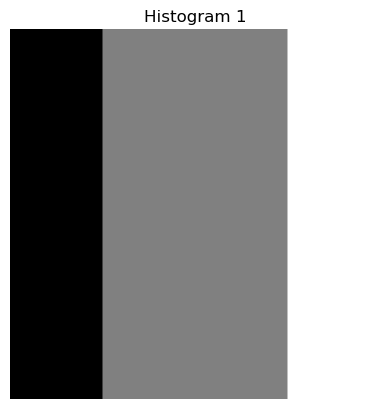

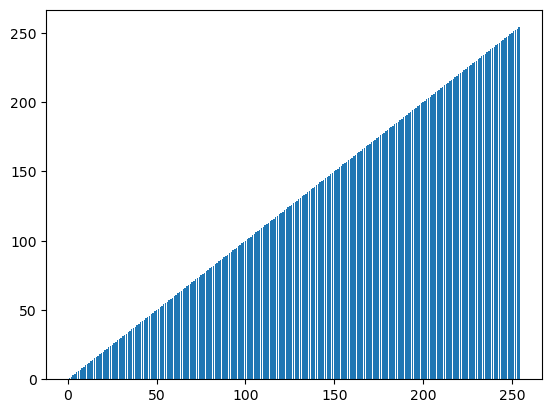

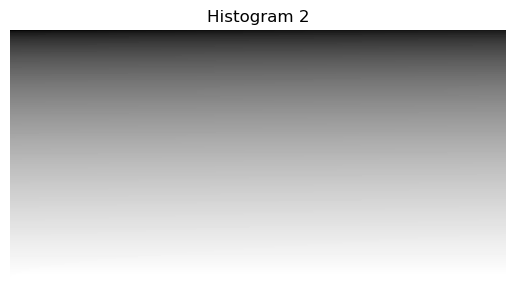

In [ ]:
#Q2  fall 22
import commonfunctions as cf
#Create a grayscale image for each of the following histograms 
# first has  10k at 0 and 20k at 100 and 10k at 200
hist1 = np.zeros((200, 200), np.uint8)
hist1[:, :50] = 0
hist1[:, 50:150] = 100
hist1[:, 150:] = 200
cf.showHist(hist1)
show_images([hist1], ['Histogram 1'])


#b)	Linear line ( x: [0,255], y: [0,255] ) [hint: try creating an image of size 255 x 102]
# 0.5 255 rows   255 col
hist2 = np.zeros((127, 255), np.uint8)
c1=0 #row
c2=0 #col
for i in range(255):
    for j in range(i):
        hist2[c1%127][c2]=i
        c2+=1
        if c2==255:
            c1+=1
            c2=0

cf.showHist(hist2)
show_images([hist2], ['Histogram 2'])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


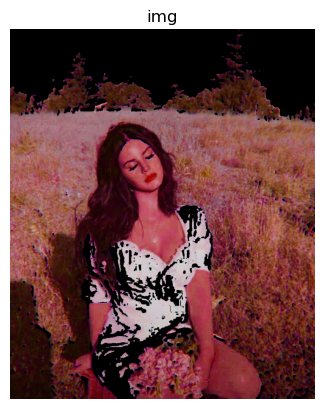

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0779999999999998].


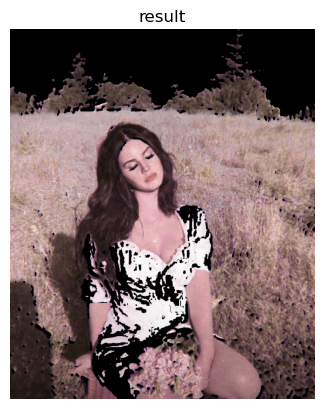

In [8]:
#Q4 sotan el bnt

from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2



img= io.imread('./Q4.jpg')


R= img[:,:,0]
G= img[:,:,1]
B= img[:,:,2]


mask = np.ones(B.shape)

mask[(B>R) & (B>G)] = 0

img[mask==0]=0
show_images([img],['img'])

result = rgb2hsv(img)
result[:,:,0]=result[:,:,0]
result[:,:,1]=result[:,:,1]*0.4
result[:,:,2]=result[:,:,2]*1.19
result = hsv2rgb(result)
show_images([result],['result'])
